In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')

## Concate Companies

In [152]:
# df_mi = pd.read_csv("小米台灣 Mi Taiwan.csv")
# df_hua = pd.read_csv("Huawei Mobile.csv")
# df_oppo = pd.read_csv("OPPO.csv")

# df_mi['company'] = 'MI'
# df_hua['company'] = "Huawei"
# df_oppo['company'] = "OPPO"
# df = pd.concat([df_mi, df_hua, df_oppo])
# df.columns = ['time', 'post_id', 'post_content', 'post_type', 'like', 'share', 'company']
# df.to_csv("mi-huawei-oppo.csv", index=False)

## Pre-processing

In [9]:
df = pd.read_csv("mi-huawei-oppo.csv")
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'] + pd.Timedelta('08:00:00')
df['post_id'] = df['post_id'].apply(lambda s: "fb.com/"+ s)
df['post_content'] = df['post_content'].astype(str)
df['post_content'] = df['post_content'].apply(lambda s: s.replace("\n", " "))

df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.weekday + 1
df['date']= df['time'].apply(lambda t: t.replace(hour=0, minute=0, second=0))
df['date-hour']= df['time'].apply(lambda t: t.replace(minute=0, second=0))
print(df['company'].unique())
df.head()

['MI' 'Huawei' 'OPPO']


,time,post_id,post_content,post_type,like,share,company,month,hour,weekday,date,date-hour
0,2017-07-13 12:08:00,fb.com/360450250740751_1339860139466419,吃飯補足元氣，20000 小米行動電源 2 代同樣給你的手機帶來滿滿的能量！ 超大容量配合雙...,NaN,244,5,MI,7,12,4,2017-07-13,2017-07-13 12:00:00
1,2017-07-12 18:00:05,fb.com/360450250740751_1352899068162526,【 小米盒子 x LiTV線上影視 電視頻道免費看 🎉 】 狂賀小米盒子開賣以來銷量破4.5...,小米台灣 Mi Taiwan updated their cover photo.,204,11,MI,7,18,3,2017-07-12,2017-07-12 18:00:00
2,2017-07-12 13:49:20,fb.com/360450250740751_1350866375032462,小米盒子贈送LiTV 更新步驟,小米台灣 Mi Taiwan published a note.,111,2,MI,7,13,3,2017-07-12,2017-07-12 13:00:00
3,2017-07-12 12:24:00,fb.com/360450250740751_1350805741705192,【 小米盒子 x LiTV線上影視 電視頻道免費看 🎉 分享抽盒子 】 狂賀小米盒子開賣以...,NaN,1368,1148,MI,7,12,3,2017-07-12,2017-07-12 12:00:00
4,2017-07-11 12:05:00,fb.com/360450250740751_1351640414955058,【 #小米橙色跑台灣站 來了！ 7月12日中午開始報名 】 🎉 報名送： 報名就送小米行動...,NaN,1653,596,MI,7,12,2,2017-07-11,2017-07-11 12:00:00


/Users/tnlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


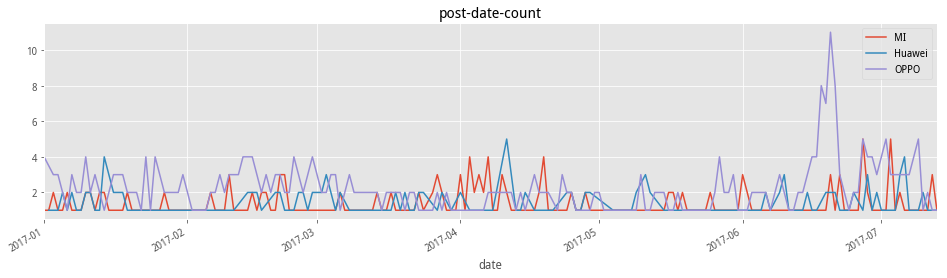

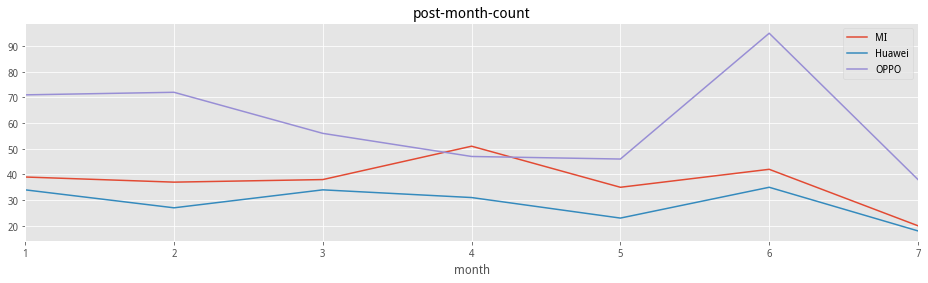

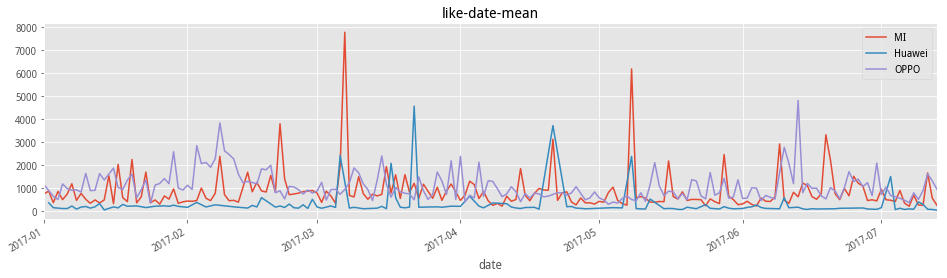

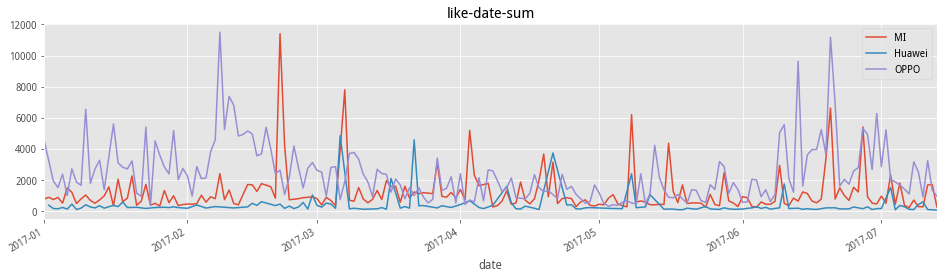

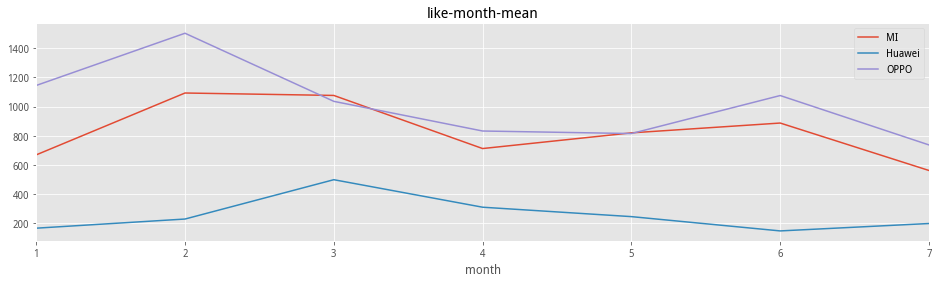

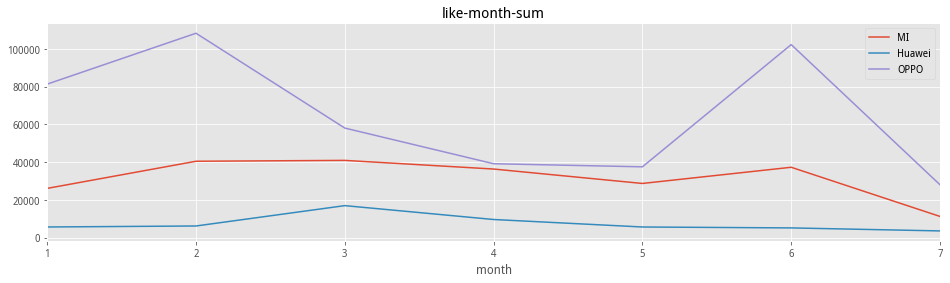

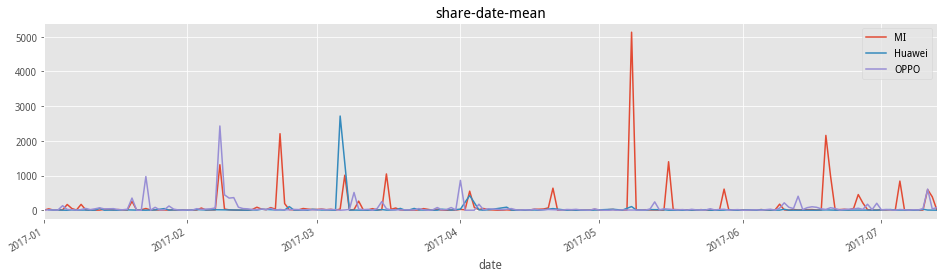

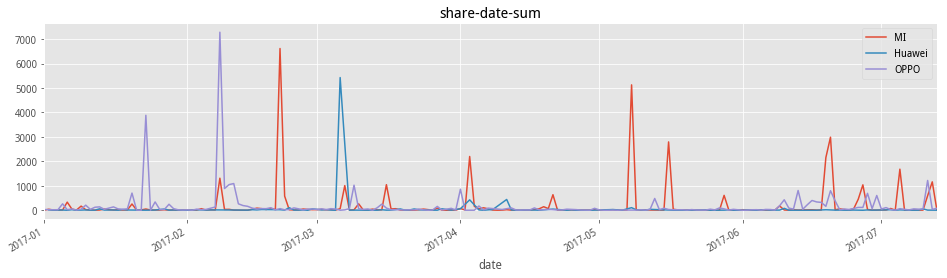

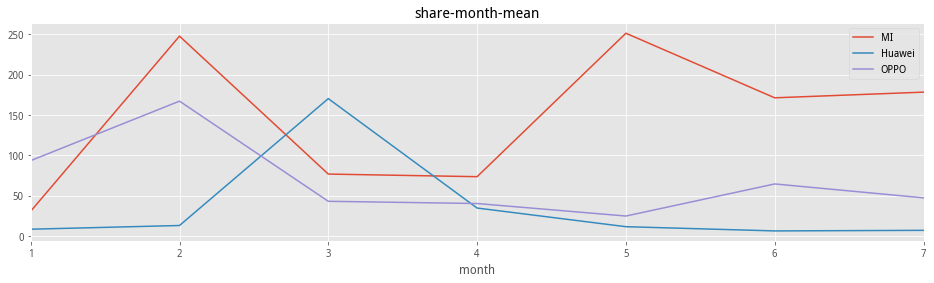

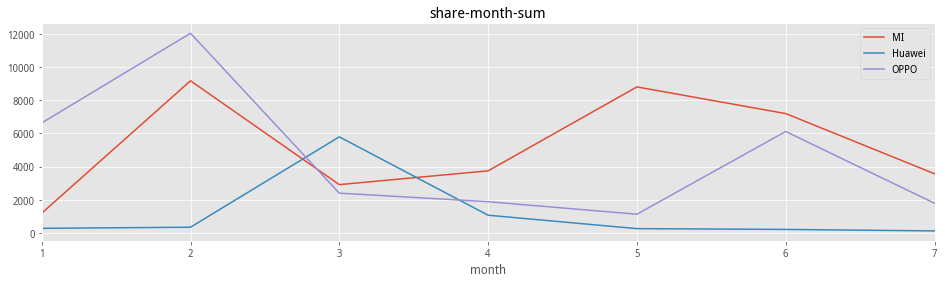

In [10]:
%matplotlib inline
def plot_graph(df_plots):
    for k, df_like in df_plots.items():
        fig, ax = plt.subplots()
        for company in df['company'].unique():
            tmp = df_like.loc[company]
            tmp.columns = [company]
            tmp.plot(ax=ax, figsize=(16, 4), title=k)

start = '2017-01-01'
stop = '2018-01-01'
tmp = df.set_index(df['time'])
tmp = tmp.ix[start:stop]

df_plots = {}
df_plots['post-date-count'] = tmp[['company', 'date', 'post_id']].groupby(['company', 'date']).count()
df_plots['post-month-count'] = tmp[['company', 'month', 'post_id']].groupby(['company', 'month']).count()
plot_graph(df_plots)

df_plots = {}
df_plots['like-date-mean'] = tmp[['company', 'date', 'like']].groupby(['company', 'date']).mean()
df_plots['like-date-sum'] = tmp[['company', 'date', 'like']].groupby(['company', 'date']).sum()
df_plots['like-month-mean'] = tmp[['company', 'month', 'like']].groupby(['company', 'month']).mean()
df_plots['like-month-sum'] = tmp[['company', 'month', 'like']].groupby(['company', 'month']).sum()
plot_graph(df_plots)

df_plots = {}
df_plots['share-date-mean'] = tmp[['company', 'date', 'share']].groupby(['company', 'date']).mean()
df_plots['share-date-sum'] = tmp[['company', 'date', 'share']].groupby(['company', 'date']).sum()
df_plots['share-month-mean'] = tmp[['company', 'month', 'share']].groupby(['company', 'month']).mean()
df_plots['share-month-sum'] = tmp[['company', 'month', 'share']].groupby(['company', 'month']).sum()
plot_graph(df_plots)

In [86]:
# events = df_plots['share-date-sum']
# events = events[events['share'] > events['share'].std()*2]
# l = []
# for c in df.company.unique():
#     event = events.loc[c]['share']
#     for idx, row in event.iteritems():
#         l.append(df[(df['date']==idx) & (df['company']==c)])

In [11]:
kind = 'like'
df1 = tmp[(tmp[kind] > tmp[kind].mean() + tmp[kind].std()*2.8)]
df1 = df1[['company', 'date', 'post_content', 'like', 'share', 'post_id']].sort_values('date')
df1.index = np.arange(1,len(df1)+1)

kind = 'share'
df2 = tmp[(tmp[kind] > tmp[kind].mean() + tmp[kind].std()*3)]
df2 = df2[['company', 'date', 'post_content', 'like', 'share', 'post_id']].sort_values('date')
df2.index = np.arange(1,len(df2)+1)

writer = pd.ExcelWriter( 'like_share.xlsx')
df1.to_excel(writer,'like', index=False)
df2.to_excel(writer,'share', index=False)
writer.save()

In [13]:
# import numpy as np; np.random.seed(0)
# def plot_heat(df_w_h, target):
#     for company in df['company'].unique():
#         tmp = df_w_h.loc[company].reset_index()
#         tmp = tmp.pivot("weekday", "hour", target)
#         plt.figure(figsize=(18,6))
#         plt.title(company + "-" + target)
#         sns.heatmap(tmp, annot=True, fmt='g')

# start = '2017-01-01'
# stop = '2018-01-01'
# df_w_h = df.set_index(df['time'])
# df_w_h = df_w_h.ix[start:stop]
# df_w_h.rename(columns={'post_id': 'post'}, inplace=True)
# df_w_h_count = df_w_h[['company', 'weekday', 'hour', 'post']].groupby(['company', 'weekday', 'hour']).count()
# df_w_h_like_mean = df_w_h[['company', 'weekday', 'hour', 'like']].groupby(['company', 'weekday', 'hour']).mean()
# df_w_h_share_mean = df_w_h[['company', 'weekday', 'hour', 'share']].groupby(['company', 'weekday', 'hour']).mean()
# plot_heat(df_w_h_count, 'post')
# plot_heat(df_w_h_like_mean, 'like')
# plot_heat(df_w_h_share_mean, 'share')


In [121]:
l = df_plots['like-date-sum']
l[l['like']>l['like'].mean()+l['like'].std()*2]

like
company date             
Huawei  2017-03-06   4828
MI      2017-02-21  11400
        2017-03-07   7793
        2017-04-03   5177
        2017-05-08   6192
        2017-06-20   6614
        2017-06-27   5397
OPPO    2017-01-10   6538
        2017-01-16   5591
        2017-01-23   5392
        2017-01-29   5156
        2017-02-08  11502
        2017-02-09   5237
        2017-02-10   7371
        2017-02-11   6792
        2017-02-12   4812
        2017-02-13   4908
        2017-02-14   5136
        2017-02-15   4949
        2017-02-18   5377
        2017-06-09   5026
        2017-06-10   5544
        2017-06-13   9635
        2017-06-18   5218
        2017-06-20  11177
        2017-06-21   6906
        2017-06-27   5308
        2017-06-28   4912
        2017-06-30   6257
        2017-07-02   5212